# Customer Churn Prediction

## Introduction
Customer churn refers to the phenomenon where customers stop doing business with a company or stop using its products or services. Predicting customer churn is crucial for businesses to retain their customers and take proactive measures to prevent them from leaving. In this document, we will explore the concept of customer churn prediction and its significance in maintaining a loyal customer base.

## Why is Customer Churn Prediction Important?
Customer churn can have a significant impact on a company's revenue and growth. By accurately predicting customer churn, businesses can:

1. Take proactive steps to retain customers and reduce churn rates.
2. Identify potential churn factors and address them effectively.
3. Optimize marketing and customer retention strategies.
4. Allocate resources efficiently to retain high-value customers.
5. Enhance overall customer satisfaction and loyalty.

## Key Steps in Customer Churn Prediction
1. Data Collection: Gather relevant data about customers, their interactions, and historical churn events. This data may include demographic information, purchase history, customer support interactions, and more.

2. Data Preprocessing: Cleanse and transform the collected data to ensure its quality and compatibility for analysis. This step involves handling missing values, removing outliers, and standardizing the data.

3. Feature Engineering: Derive meaningful features from the available data that can potentially influence customer churn. These features may include customer tenure, average spending, usage patterns, sentiment analysis of customer interactions, and more.

4. Model Selection: Choose an appropriate machine learning model that can effectively predict customer churn based on the available features and data. Commonly used models include logistic regression, decision trees, random forests, and gradient boosting algorithms.

5. Model Training and Evaluation: Split the dataset into training and testing sets. Train the chosen model using the training set and evaluate its performance using appropriate metrics such as accuracy, precision, recall, and F1-score.

6. Hyperparameter Tuning: Fine-tune the model's hyperparameters to optimize its performance. This step involves using techniques like cross-validation and grid search to find the best combination of hyperparameters.

7. Prediction and Interpretation: Apply the trained model to new, unseen data to predict customer churn. Analyze the model's predictions and interpret the importance of different features in determining churn likelihood.

8. Deployment and Monitoring: Integrate the churn prediction model into the business workflow to identify at-risk customers in real-time. Continuously monitor the model's performance and update it periodically to adapt to changing customer behavior.

## Conclusion
Customer churn prediction plays a crucial role in maintaining a strong customer base and maximizing business growth. By implementing effective churn prediction strategies, companies can identify potential churners early on and take proactive measures to retain them.

In [1]:
# Importing all modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data
data = pd.read_csv('Customer-Churn-Records.csv')

# Printing the top 5 values
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Data Assessing and Cleaning

Before performing any analysis or building predictive models, it is crucial to ensure that the data is clean and of high quality. Data cleaning involves identifying and resolving issues such as missing values, outliers, and inconsistencies in the dataset. Assessing the data helps us gain a better understanding of its structure and characteristics.

### Steps in Data Cleaning and Assessing

1. **Identify Missing Values**: Determine if there are any missing values in the dataset. Missing values can be problematic as they can introduce biases and affect the accuracy of the analysis. Identify the columns or variables with missing values and decide how to handle them. Options include imputing values, removing rows or columns with missing values, or using statistical techniques to fill in the gaps.

2. **Handle Outliers**: Outliers are extreme values that deviate significantly from the majority of the data. They can distort analysis results and affect the performance of predictive models. Identify and assess potential outliers in the dataset. Decide whether to remove them, transform them, or create separate categories for them, depending on the nature of the data and the analysis goals.

3. **Address Data Inconsistencies**: Inconsistent data can arise from various sources, such as data entry errors or differences in data formats. Identify inconsistencies in the dataset, such as variations in spelling, capitalization, or data types. Standardize the data to ensure consistency and compatibility across the dataset.

4. **Check Data Quality**: Assess the overall quality of the data. Look for duplicate entries, erroneous values, or data that does not conform to the expected patterns or ranges. Validate the data against predefined rules or business logic to ensure its integrity.

5. **Explore Data Statistics**: Perform exploratory data analysis to understand the distribution, central tendencies, and relationships between variables. Calculate summary statistics such as mean, median, mode, standard deviation, and correlation coefficients. Visualize the data using plots, histograms, scatter plots, or other appropriate visualization techniques.

### Data Assessing

In [3]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [4]:
data.isna()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
data.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [6]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
data['Card Type'].value_counts()

DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: Card Type, dtype: int64

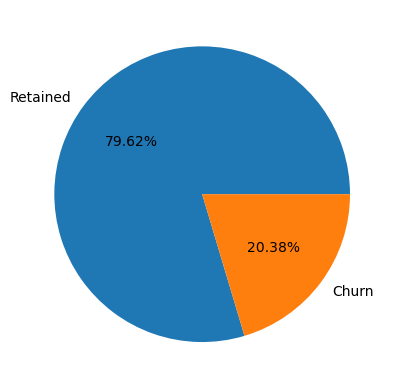

In [8]:
plt.pie(data["Exited"].value_counts(), labels=["Retained", "Churn"], autopct="%0.2f%%")
plt.show()

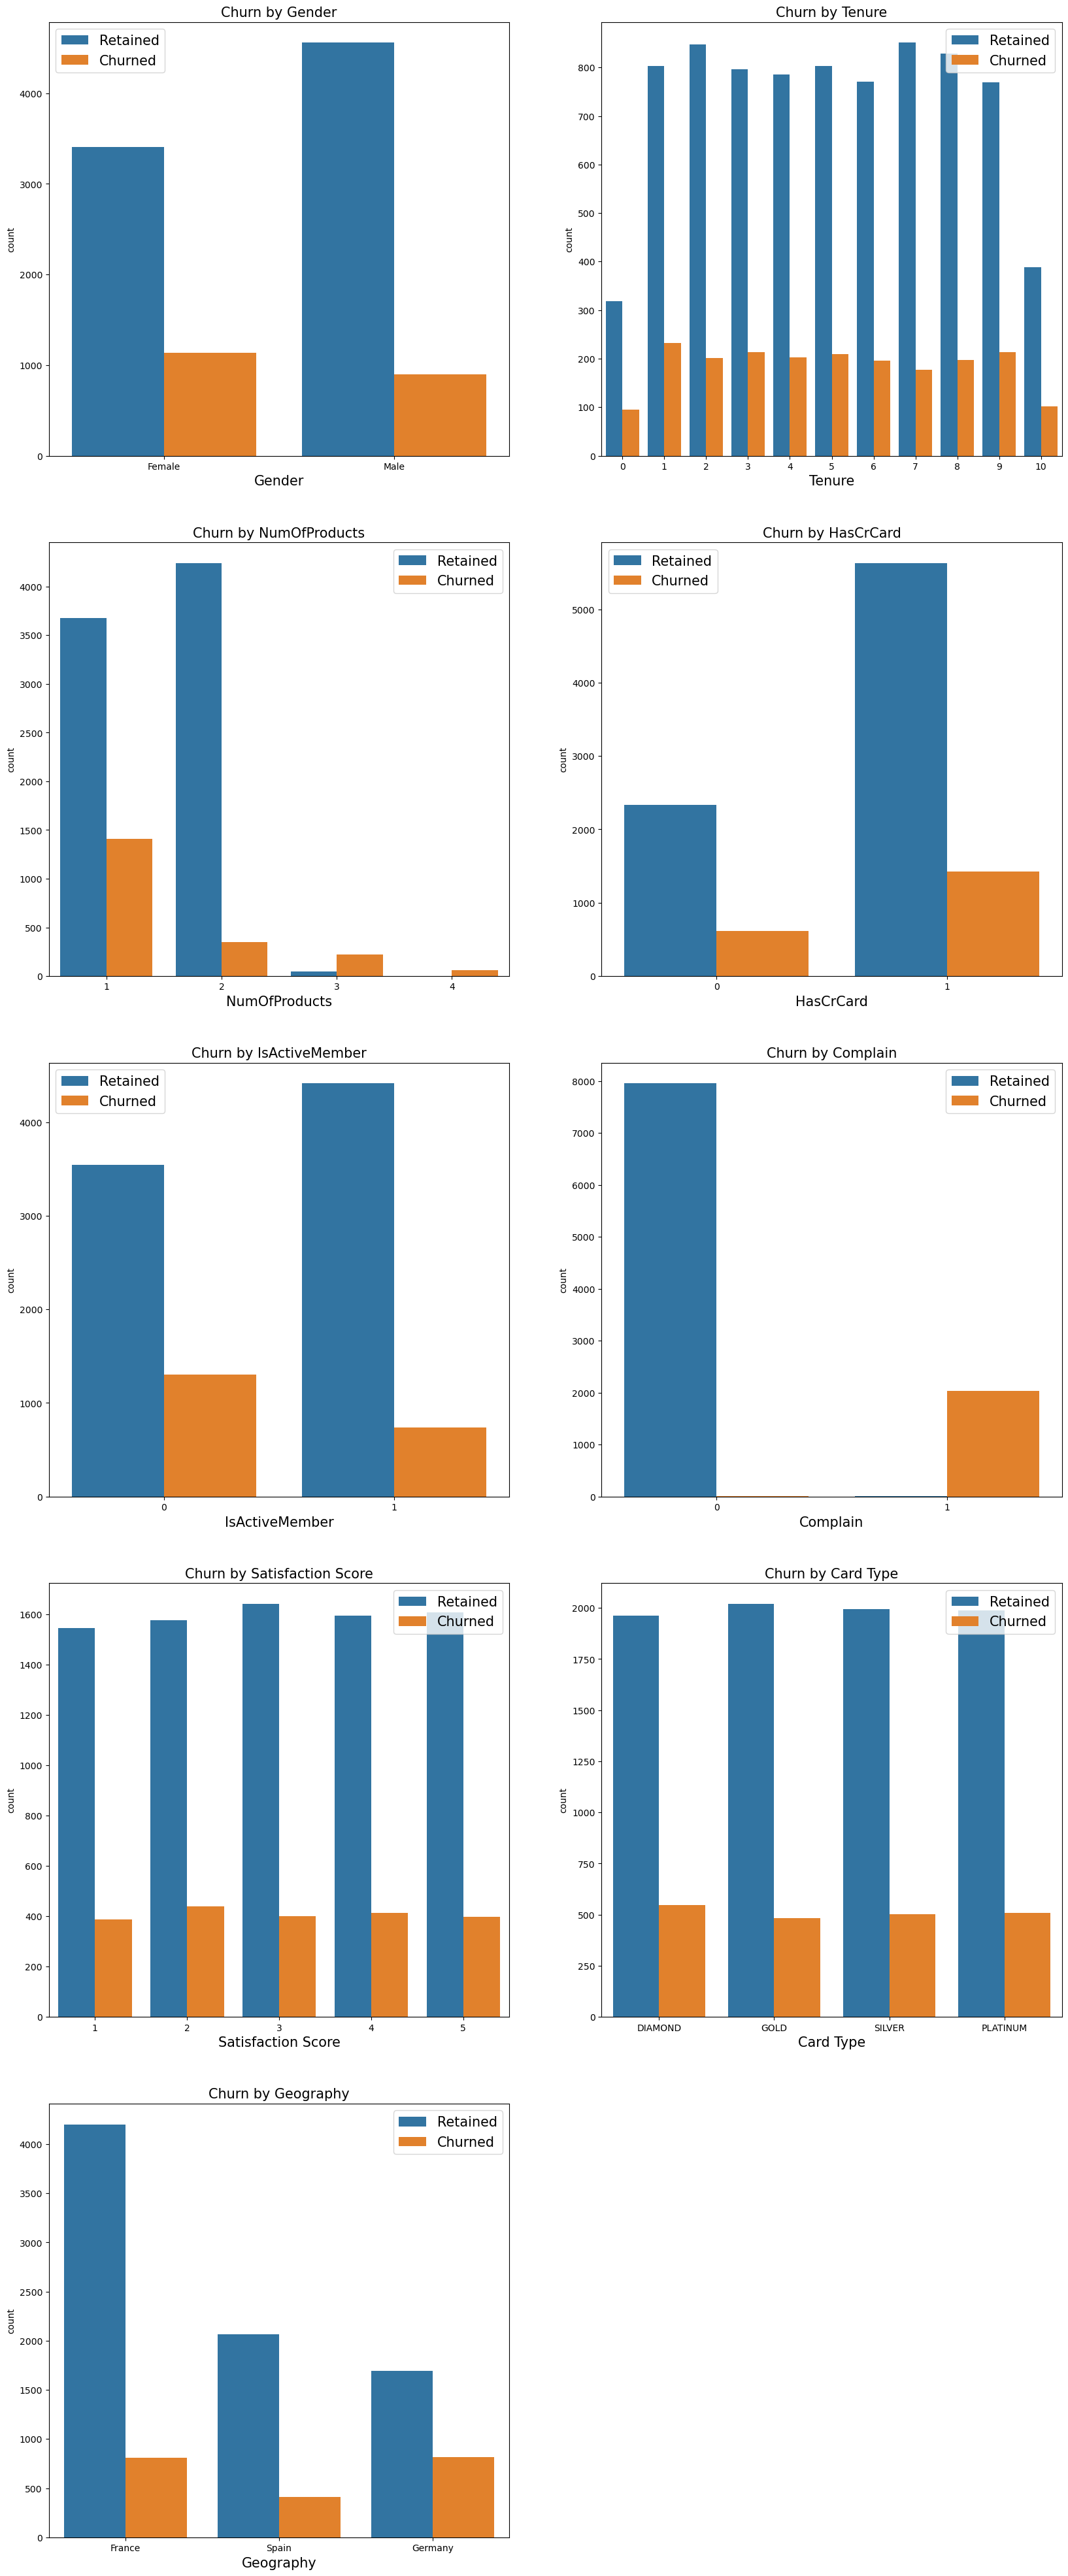

In [9]:
count_plt = ['Gender',
            'Tenure',
            'NumOfProducts',
            'HasCrCard',
            'IsActiveMember',
            'Complain',
            'Satisfaction Score',
            'Card Type',
            'Geography']

plt.figure(figsize=(20, 50))
for feature, x in zip(count_plt, range(0,len(count_plt))):
    plt.subplot(5, 2, x+1)
    sns.countplot(x=feature, hue='Exited', data=data)
    plt.xlabel(feature, fontsize=15)
    plt.legend(fontsize=15, labels=["Retained", "Churned"])
    plt.title('Churn by ' + feature, fontsize=15)

### Data Cleaning

In [10]:
# First, we gotta remove all the irrelevant columns.

data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)     # inplace makes sure the changes are permanent

# We are using one hot encoding for categories
data = pd.get_dummies(data, columns=['Geography', 'Card Type', 'Gender'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Tenure              10000 non-null  int64  
 3   Balance             10000 non-null  float64
 4   NumOfProducts       10000 non-null  int64  
 5   HasCrCard           10000 non-null  int64  
 6   IsActiveMember      10000 non-null  int64  
 7   EstimatedSalary     10000 non-null  float64
 8   Exited              10000 non-null  int64  
 9   Complain            10000 non-null  int64  
 10  Satisfaction Score  10000 non-null  int64  
 11  Point Earned        10000 non-null  int64  
 12  Geography_France    10000 non-null  uint8  
 13  Geography_Germany   10000 non-null  uint8  
 14  Geography_Spain     10000 non-null  uint8  
 15  Card Type_DIAMOND   10000 non-null  uint8  
 16  Card 

In [11]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,1,0,0,1,0,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,0,0,1,1,0,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,1,0,0,1,0,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,1,0,0,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,0,0,1,0,1,0,0,1,0


### Spliting Data into Train and Test sets

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Splitting the DataFrame into Features (X) and target (y)
X = data.drop('Exited', axis=1)
y = data['Exited']

# Split the data into train and test cases, 20% of total cases are the test cases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fiting the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculating the precision of the model
precision = precision_score(y_test, y_pred)
print('Precision:', precision)

# Calculating the recall of the model
recall = recall_score(y_test, y_pred)
print('Recall:', recall)

Accuracy: 0.999
Precision: 0.9974554707379135
Recall: 0.9974554707379135
